In [1]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [74]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,source
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,test
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,test
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,test
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,test
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,test


In [75]:
test["BHK_OR_RK"].unique()

array(['BHK', 'RK'], dtype=object)

In [5]:
print("train data shape",train.shape)
print("test data shape",test.shape)

train data shape (29451, 12)
test data shape (68720, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [8]:
train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [26]:
replace_POSTED_BY = {'Dealer': 0, 'Owner': 1, 'Builder': 2}
df['POSTED_BY'] = df.POSTED_BY.map(replace_POSTED_BY)

In [72]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
source                   0
dtype: int64

In [73]:
test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
source                0
dtype: int64

In [11]:
train.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0


In [12]:
train["POSTED_BY"].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [13]:
train["UNDER_CONSTRUCTION"].value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

In [14]:
train["BHK_NO."].value_counts()

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

In [15]:
train["READY_TO_MOVE"].value_counts()

1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64

In [82]:
train["source"] = "train"
test["source"] = "test"
train.select_dtypes(include = np.number).columns
train.select_dtypes(exclude = np.number).columns

Index(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS', 'source'], dtype='object')

In [17]:
#train_concat = train 
df = pd.concat([train,test])

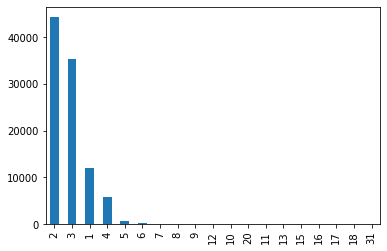

In [18]:
df["BHK_NO."].value_counts().plot(kind= "bar")

C:\Users\MSD\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

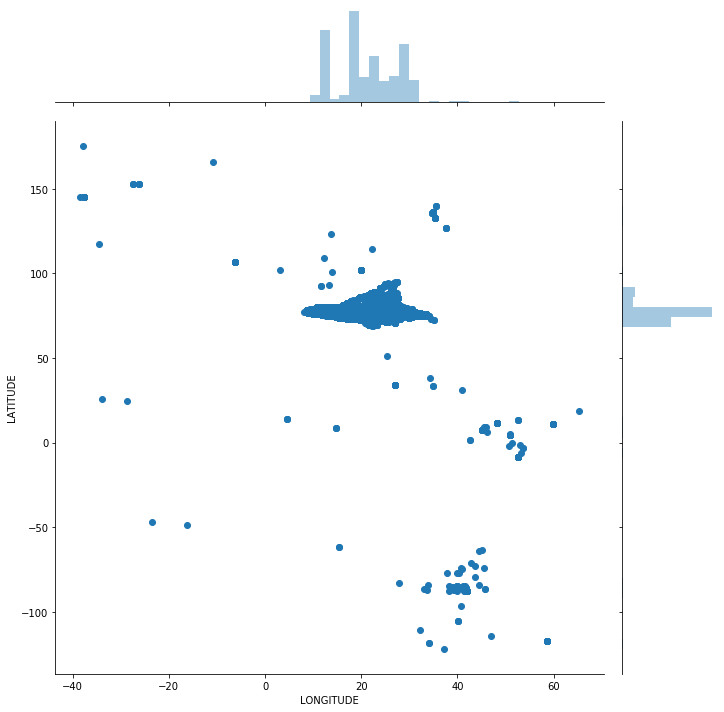

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [19]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df["LONGITUDE"],y=df["LATITUDE"],size=10)
plt.show()
sns.despine

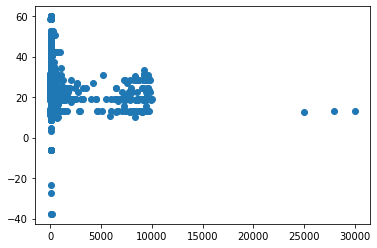

In [20]:
plt.scatter(df["TARGET(PRICE_IN_LACS)"],df["LONGITUDE"])

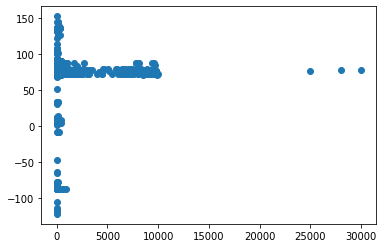

In [21]:
plt.scatter(train["TARGET(PRICE_IN_LACS)"],train["LATITUDE"])

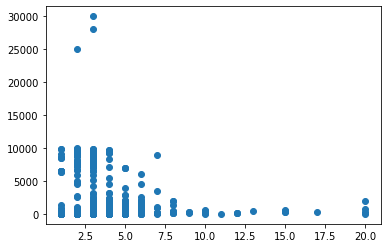

In [22]:
plt.scatter(train["BHK_NO."],train["TARGET(PRICE_IN_LACS)"])
plt.show()

In [45]:
#df["loc_grp"] = df.groupby(["LONGITUDE","LATITUDE"]).ngroups
df["loc_grp"] = df.groupby(["LONGITUDE","LATITUDE"]).grouper.group_info[0]

In [66]:
df['POSTED_BY'].unique()

array([1, 0, 2], dtype=int64)

In [49]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'source', 'loc_grp'],
      dtype='object')

In [50]:
df["loc_grp"].nunique()

6868

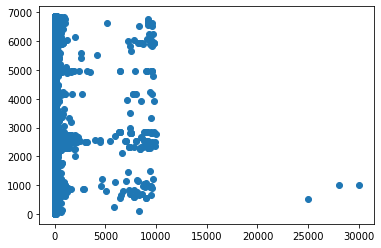

In [51]:
plt.scatter(df["TARGET(PRICE_IN_LACS)"],df["loc_grp"])

In [52]:
df["TARGET(PRICE_IN_LACS)"].min()

0.25

In [54]:
df_number_columns = df.select_dtypes(include = np.number).columns
df_number_columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT',
       'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE',
       'TARGET(PRICE_IN_LACS)', 'loc_grp'],
      dtype='object')

In [55]:
df_category_columns = df.select_dtypes(exclude = np.number).columns
df_category_columns

Index(['BHK_OR_RK', 'ADDRESS', 'source'], dtype='object')

In [57]:
df["BHK_OR_RK"].value_counts()

BHK    98089
RK        82
Name: BHK_OR_RK, dtype: int64

In [67]:
replace_BHK_OR_RK = {'BHK': 0, 'RK': 1}
df["BHK_OR_RK"] = df.BHK_OR_RK.map(replace_BHK_OR_RK)

In [59]:
df_category_columns = df.select_dtypes(exclude = np.number).columns
df_category_columns

Index(['ADDRESS', 'source'], dtype='object')

In [68]:
train_preprocessed = df[df["source"]=="train"]
test_preprocessed = df[df["source"]=="test"]

In [69]:
train_preprocessed.shape

(29451, 14)

In [70]:
test_preprocessed.shape

(68720, 14)

In [63]:
train_preprocessed.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'source', 'loc_grp'],
      dtype='object')

In [64]:
test_preprocessed.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'source', 'loc_grp'],
      dtype='object')

In [71]:
test_preprocessed.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),source,loc_grp
0,1,0,0,1,NaN,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,NaN,test,3653
1,0,1,1,2,NaN,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,NaN,test,2518
2,0,0,0,2,NaN,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,NaN,test,4252
3,0,0,0,3,NaN,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,NaN,test,5638
4,1,0,0,1,NaN,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,NaN,test,4375
